# Project 3: Clustering

## Business Understanding (10 points total).
• [10 points] Describe the purpose of the data set you selected (i.e., why was this data
collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?

## Data Understanding (20 points total)
• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file. Verify data quality: Are there missing values? Duplicate data?
Outliers? Are those mistakes? How do you deal with these problems?

• [10 points] Visualize the any important attributes appropriately. Important: Provide an
interpretation for any charts or graphs.

In [68]:
import pandas as pd
import numpy as np
import os
# import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances

# import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

In [107]:
# path = "/home/kyle/Documents/thomaskh522@gmail.com/SMU/DataMining/Classificaiton2/"
path = 'C:/Users/Casiano/Dropbox/SMU_DataScience/MSDS_7331_Data_Mining/Project3/'
df =  pd.read_csv(path + "SCADAcombined2017_T014_PROJECT3.csv")

del df['TimeStamp']
df.dropna(inplace=True)
# df = df.reset_index()

df['diff'] = df['wtc_ScYawPos_mean'] - df['WindDir_D1_WVT']

print("Dimensions of data frame: ", df.shape)
print(df.info())
df.head()

Dimensions of data frame:  (52451, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52451 entries, 0 to 52461
Data columns (total 3 columns):
wtc_ScYawPos_mean    52451 non-null float64
WindDir_D1_WVT       52451 non-null float64
diff                 52451 non-null float64
dtypes: float64(3)
memory usage: 1.6 MB
None


wtc_ScYawPos_mean  WindDir_D1_WVT      diff
0           350.3289           41.78  308.5489
1           356.3080           38.27  318.0380
2           359.3556           40.67  318.6856
3           360.1000           38.86  321.2400
4           358.4161           42.44  315.9761

## Modeling and Evaluation (50 points total)
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
the data you have chosen and use visualizations of the results to explain the performance and
expected outcomes whenever possible. Guide the reader through your analysis with plenty of
discussion of the results. Each option is broken down by:

• [10 Points] Train and adjust parameters

• [10 Points] Evaluate and Compare

• [10 Points] Visualize Results

• [20 Points] Summarize the Ramifications

### Option A: Cluster Analysis
• Train: Perform cluster analysis using several clustering methods (adjust parameters).

• Eval: Use internal and/or external validation measures to describe and compare the
clusterings and the clusters— how did you determine a suitable number of clusters for
each method?

• Visualize: Use tables/visualization to discuss the found results. Explain each
visualization in detail.

• Summarize: Describe your results. What findings are the most interesting and why?

### Train: Perform Custer Analysis Using Several Clustering methods and adjust parameters (10 points)

First, I want to look at wind speed vs historical power output. It will be interesting to see how different turbines are clustered together, especially if their name plate capacity is different across clusters.

## First I need to look at a graph of the two variables that I am attempting to cluster. I want to see if there are any obvious groups to adjust the number of clusters for KMeans and for adjustment of other parameters. 

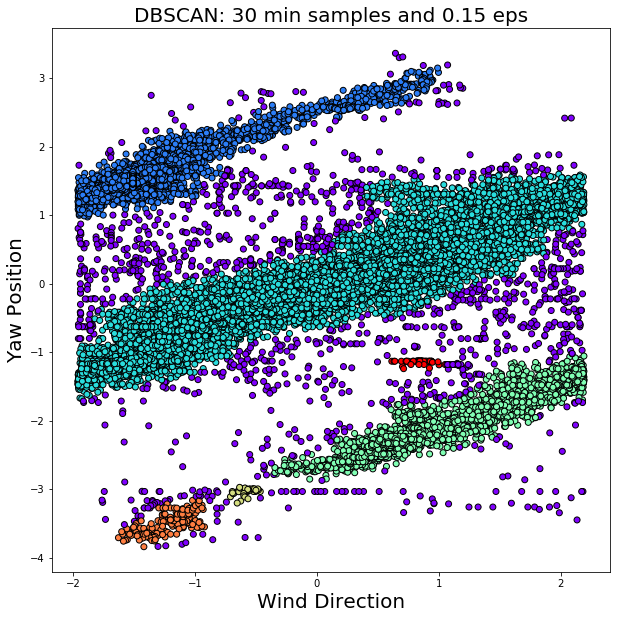

Estimated number of clusters: 6
Silhouette Score = 0.466767203508


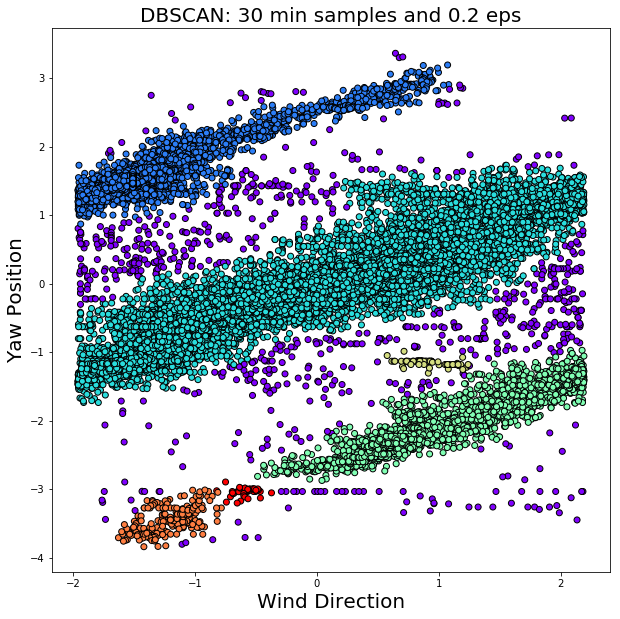

Estimated number of clusters: 6
Silhouette Score = 0.488246530396


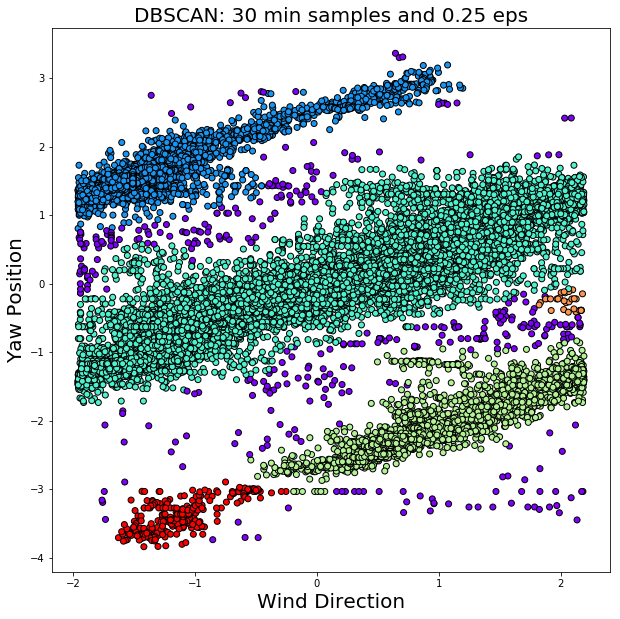

Estimated number of clusters: 5
Silhouette Score = 0.492108647791


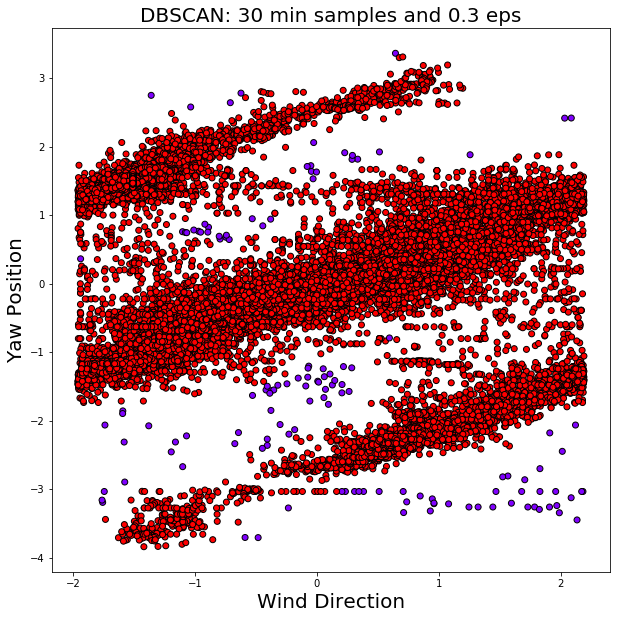

Estimated number of clusters: 1
Silhouette Score = 0.415403882635


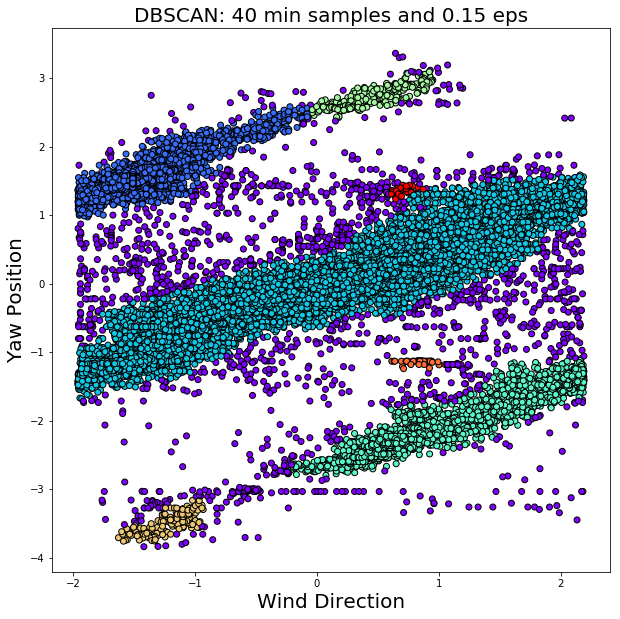

Estimated number of clusters: 7
Silhouette Score = 0.35764866455


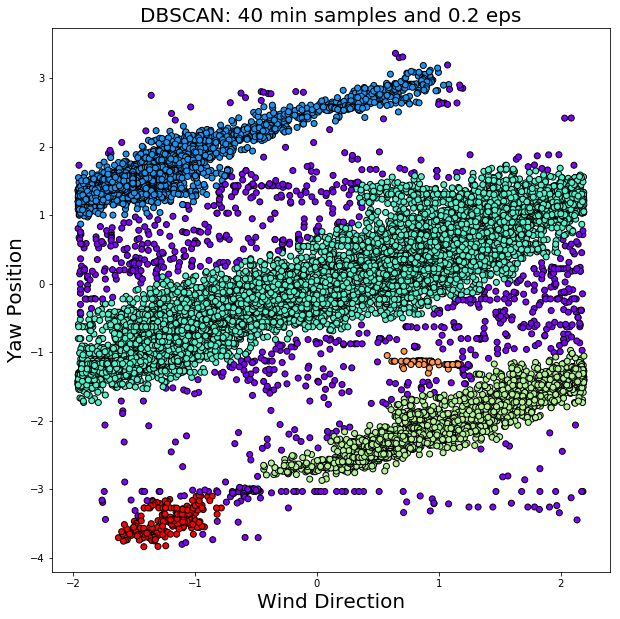

Estimated number of clusters: 5
Silhouette Score = 0.475942891148


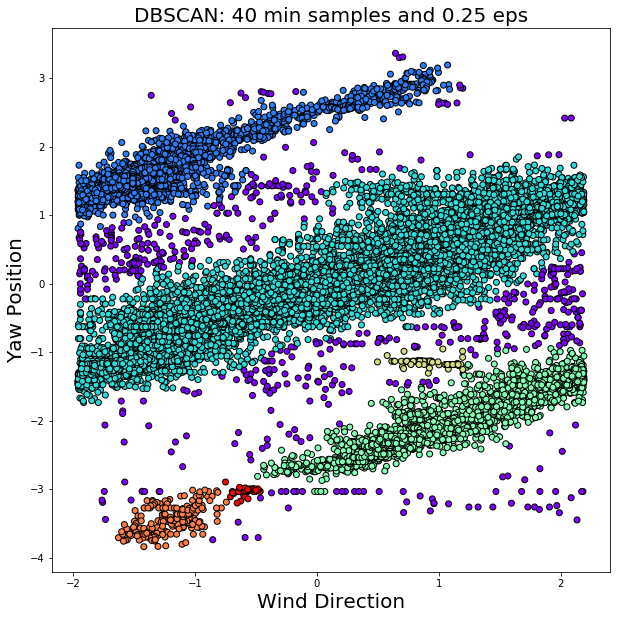

Estimated number of clusters: 6
Silhouette Score = 0.477888988701


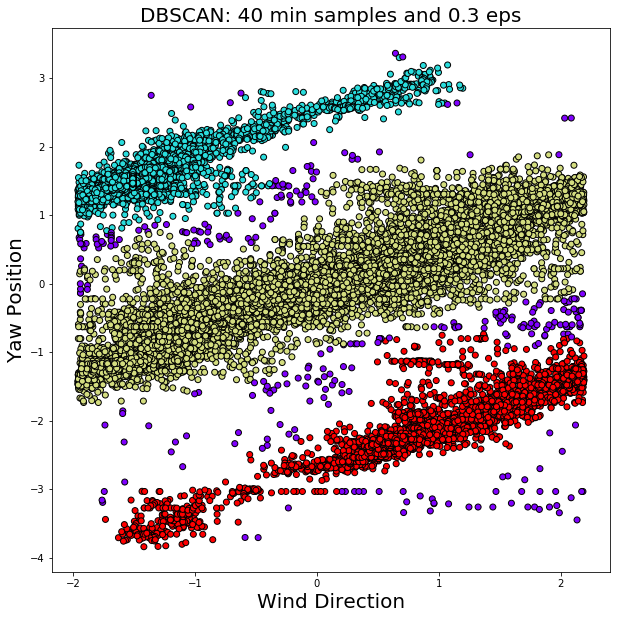

Estimated number of clusters: 3
Silhouette Score = 0.58609751082


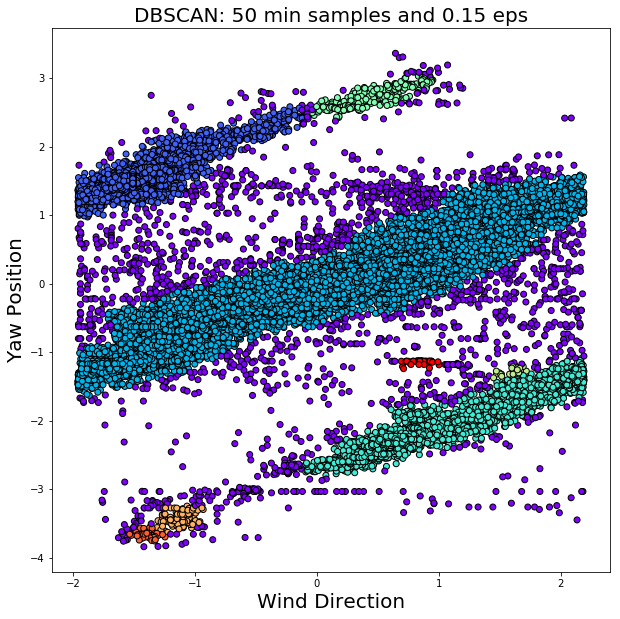

Estimated number of clusters: 8
Silhouette Score = 0.445545089381


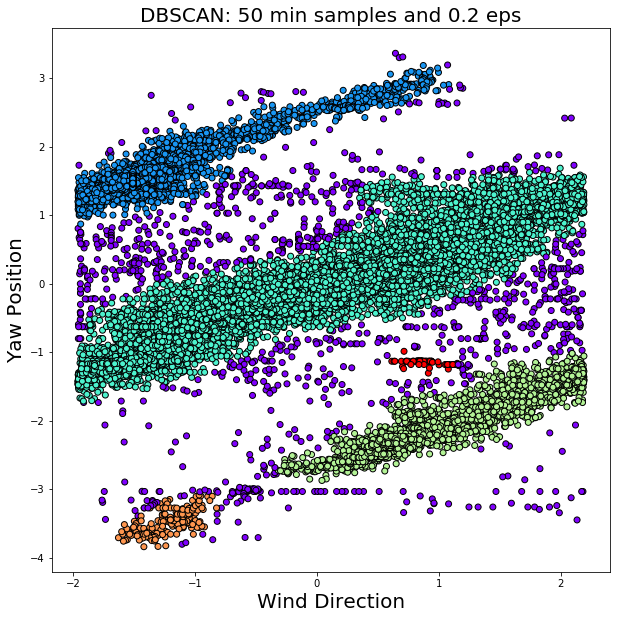

Estimated number of clusters: 5
Silhouette Score = 0.483147153265


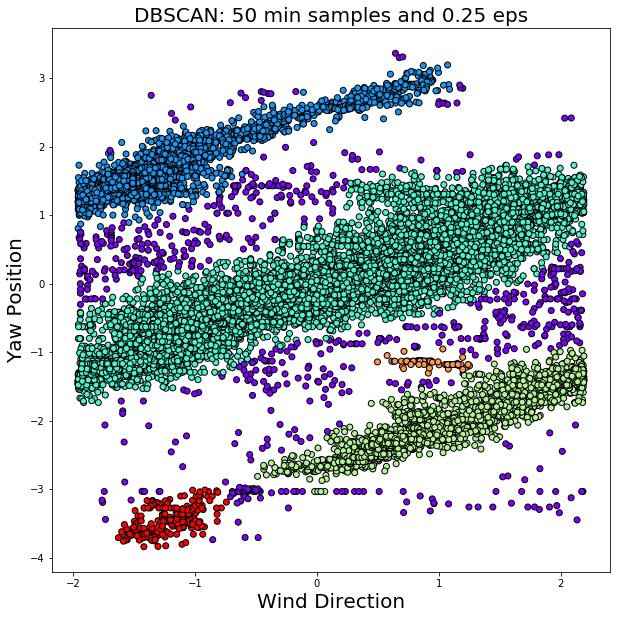

Estimated number of clusters: 5
Silhouette Score = 0.487669629285


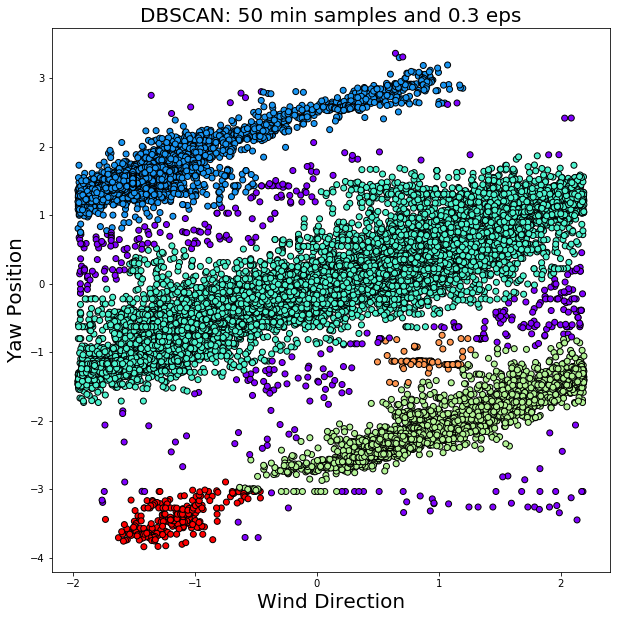

Estimated number of clusters: 5
Silhouette Score = 0.475691133406


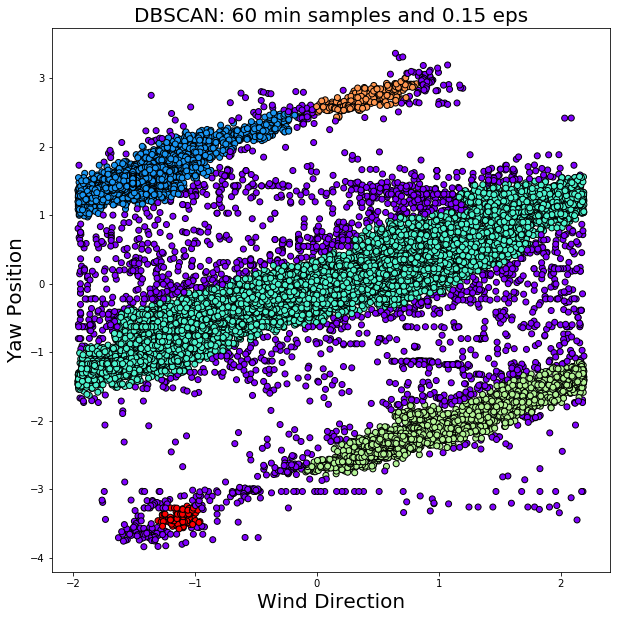

Estimated number of clusters: 5
Silhouette Score = 0.53166184779


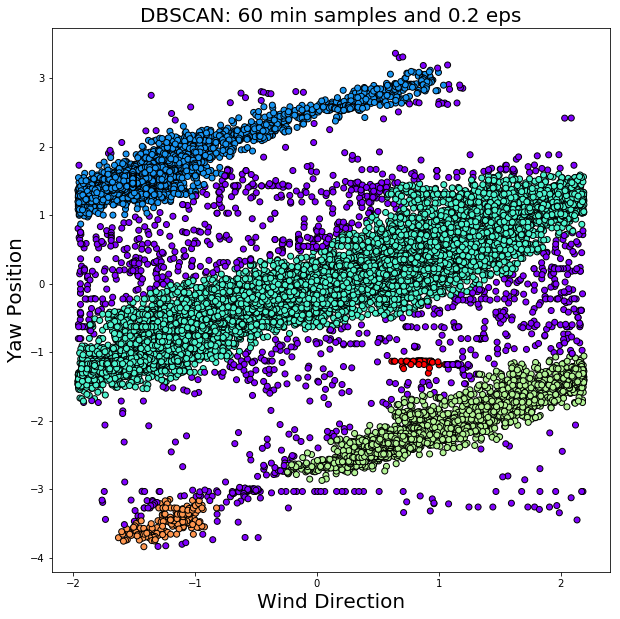

Estimated number of clusters: 5
Silhouette Score = 0.483303510537


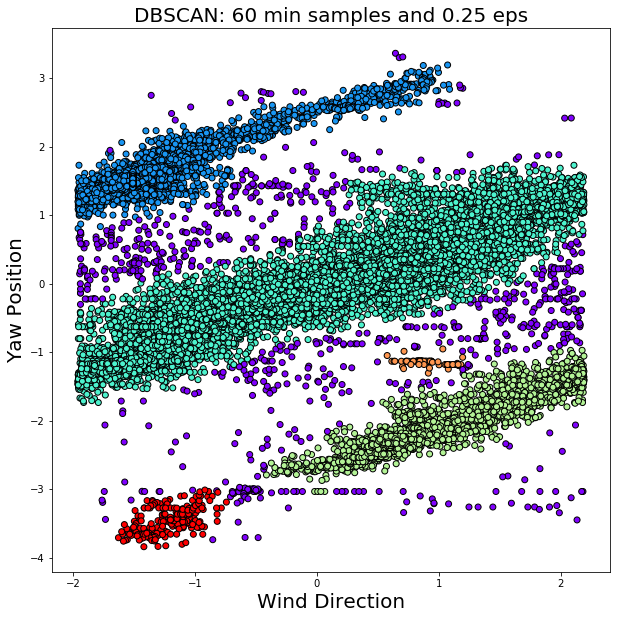

Estimated number of clusters: 5
Silhouette Score = 0.481789423157


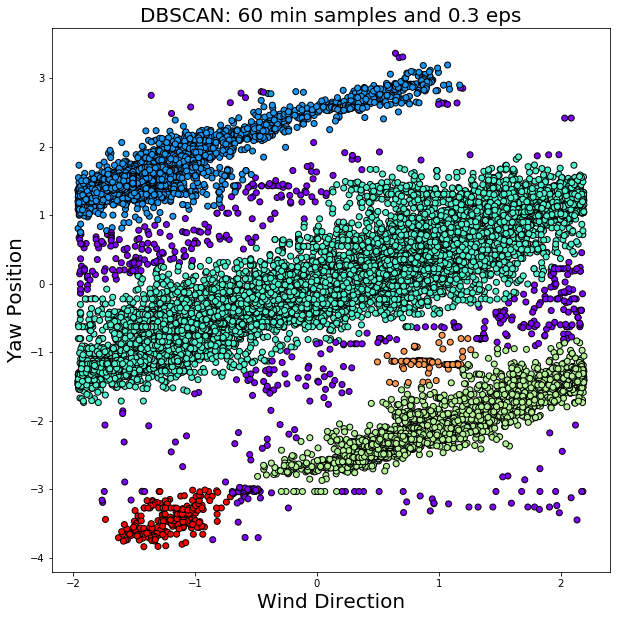

Estimated number of clusters: 5
Silhouette Score = 0.480916571681


In [139]:
# df2 = df.sample(10000, replace=False)
X = StandardScaler().fit_transform(df)

score_list = []
cluster_list = []

min_samples_range = range(30,70,10)
eps_range = np.arange(0.15,0.35,0.05)

for x in min_samples_range:
    for y in eps_range:
        min_samples = x
        eps = y

        model = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1).fit(X)
        
        plt.figure(figsize=(10,10))
        plt.scatter(X[:,1], X[:,0], c=model.labels_, cmap=plt.cm.rainbow,edgecolors='k')
        plt.ylabel("Yaw Position", fontsize=20)
        plt.xlabel("Wind Direction", fontsize=20)
        plt.title("DBSCAN: %s min samples and %s eps" %(min_samples, eps), fontsize=20)
        plt.show()

        n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
        cluster_list.append(n_clusters_)
        print('Estimated number of clusters: %d' % n_clusters_)
        
        
        score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=5000)
        score_list.append(score)
        print("Silhouette Score = %s" %(score))

Min Samples 40 & Epsilon 0.3 is best

In [153]:
# plot the similarity matrix
from sklearn.metrics import pairwise

X2 = df.sample(3000, replace=False)

y=model.labels_
idx_sorted = np.argsort(y,kind="quicksort")  # need to get the ordering of Y
df_sorted = X2[idx_sorted]  # sort the dfset by class
%time R = pairwise.euclidean_distances(df_sorted)  # calculate the similarity

#transform distance to similarity
min_r = np.min(R)
max_r = np.max(R)
R = 1-(R-min_r)/(max_r-min_r)

# plt.figure(figsize=(20,10))
plt.pcolormesh(R)
plt.colorbar()

# plot class boundaries
bounds = np.cumsum([np.sum(y==val) for val in np.unique(y)])
for b in bounds:
    plt.plot([b,b],[0, len(y)],'k',linewidth=4)
    plt.plot([0, len(y)],[b,b],'k',linewidth=4)

plt.show()

KeyError: '[17836 30937 30936 ..., 31368 31352 31537] not in index'

C:\Users\Casiano\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


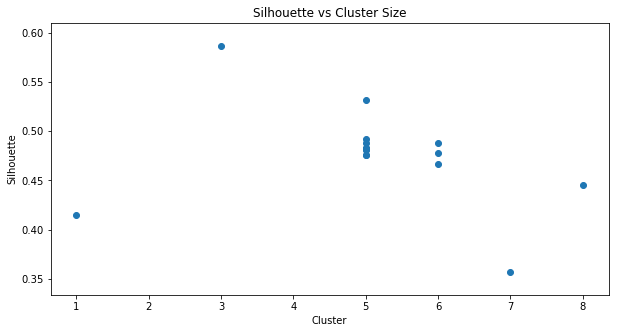

In [141]:
plt.figure(figsize=(10,5))
plt.scatter(x=cluster_list,y=score_list)
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
plt.legend()
plt.show()

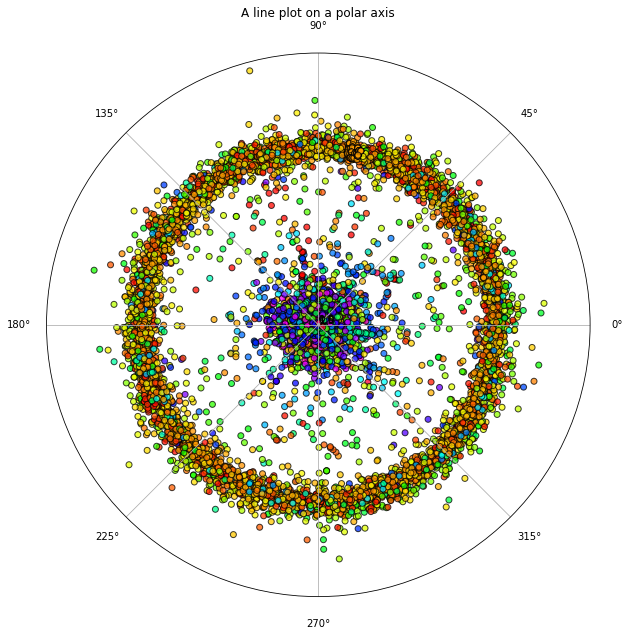

In [138]:
"""
Demo of a line plot on a polar axis.
"""
import numpy as np
import matplotlib.pyplot as plt


r = df['diff']
theta = df['WindDir_D1_WVT']
colors = theta

plt.figure(figsize=(10,10))
ax = plt.subplot(projection='polar')

ax.scatter(theta, r, alpha=0.75, edgecolors='k', c=colors, cmap='hsv')

ax.set_rmax(500)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-30)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')

plt.show()

In [137]:
df['diff'].max()

483.92959999999994

## Deployment (10 points total)
• Be critical of your performance and tell the reader how you current model might be usable by
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?

• How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it)?

• How would your deploy your model for interested parties?

• What other data should be collected?

• How often would the model need to be updated, etc.?

## Exceptional Work (10 points total)
• You have free reign to provide additional analyses or combine analyses.